In [37]:
# importing libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix

In [8]:
# loading data_set:
loan_def = pd.read_csv("C:/Users/Arhum/Downloads/Default_Fin.csv")
loan_def

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [9]:
loan_def.info

<bound method DataFrame.info of       Index  Employed  Bank Balance  Annual Salary  Defaulted?
0         1         1       8754.36      532339.56           0
1         2         0       9806.16      145273.56           0
2         3         1      12882.60      381205.68           0
3         4         1       6351.00      428453.88           0
4         5         1       9427.92      461562.00           0
...     ...       ...           ...            ...         ...
9995   9996         1       8538.72      635908.56           0
9996   9997         1       9095.52      235928.64           0
9997   9998         1      10144.92      703633.92           0
9998   9999         1      18828.12      440029.32           0
9999  10000         0       2411.04      202355.40           0

[10000 rows x 5 columns]>

In [10]:
loan_def.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [11]:
loan_def.tail()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0
9999,10000,0,2411.04,202355.40,0


In [12]:
loan_def.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

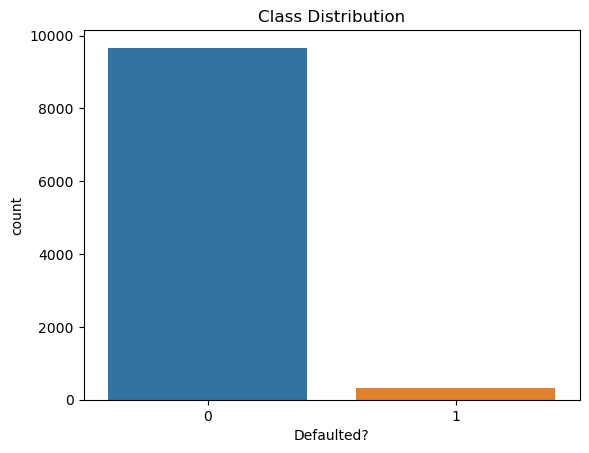

In [13]:
sns.countplot(data=loan_def, x="Defaulted?")
plt.title("Class Distribution")
plt.show()

In [14]:
# dropping unecessary_column:
loan_def.drop(columns=['Index'],axis=1,inplace=True)

In [15]:
loan_def

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


In [16]:
loan_def['Defaulted?'].value_counts()

Defaulted?
0    9667
1     333
Name: count, dtype: int64

In [17]:
#Splitting the data into X and y:
X = loan_def.drop(columns=['Defaulted?'],axis=1)
y = loan_def['Defaulted?']
print(f"Data of X: {X}")
print(f"Data of y: {y}")

Data of X:       Employed  Bank Balance  Annual Salary
0            1       8754.36      532339.56
1            0       9806.16      145273.56
2            1      12882.60      381205.68
3            1       6351.00      428453.88
4            1       9427.92      461562.00
...        ...           ...            ...
9995         1       8538.72      635908.56
9996         1       9095.52      235928.64
9997         1      10144.92      703633.92
9998         1      18828.12      440029.32
9999         0       2411.04      202355.40

[10000 rows x 3 columns]
Data of y: 0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Defaulted?, Length: 10000, dtype: int64


In [18]:
# training and testing:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [19]:
X_train.shape

(8000, 3)

In [20]:
X_test.shape

(2000, 3)

In [21]:
y_train.shape

(8000,)

In [22]:
y_test.shape

(2000,)

In [17]:
# Balancing the data because there is imbalancenes so we use SMOTE technique to tackle this problem:
!pip install imbalanced-learn

In [18]:
!pip install --upgrade scikit-learn


In [20]:
!pip uninstall -y scikit-learn imbalanced-learn

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Arhum\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\Arhum\anaconda3\Lib\site-packages\pip\_internal\commands\uninstall.py", line 110, in run
    uninstall_pathset.commit()
  File "C:\Users\Arhum\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 432, in commit
    self._moved_paths.commit()
  File "C:\Users\Arhum\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 278, in commit
    save_dir.cleanup()
  File "C:\Users\Arhum\anaconda3\Lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\Users\Arhum\anaconda3\Lib\site-packages\pip\_vendor\tenacity\__init__.py", line 291, in wrapped_f
    return self(f, *args, **kw)
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Arhum\anaconda3\Lib\site-packages\pip\_vend

In [21]:
!pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0

  Obtaining dependency information for scikit-learn==1.3.2 from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for imbalanced-learn==0.11.0 from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB 435.7 kB/s eta 0:00:22
   ---------------------------------------- 0.1/9.2 MB 762.6 kB/s eta 0:00:12
   ---------------------------------------- 0.1/9.2 MB 939.4 kB/s eta 0:00:10
   - -------------------------------------- 0.2/9.2 MB 1.3 MB/s eta 0:00:07
   - -------------------------------------- 0.4/9.2 MB 1.5 MB/s eta 0:00:06
   -- -------------------

In [1]:
from imblearn.over_sampling import SMOTE

In [2]:
import sklearn
import imblearn

print("scikit-learn:", sklearn.__version__)
print("imbalanced-learn:", imblearn.__version__)


scikit-learn: 1.3.2
imbalanced-learn: 0.11.0


In [23]:
# Balancing the data because there is imbalancenes so we use SMOTE technique to tackle this problem:
smote = SMOTE(random_state=42)
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

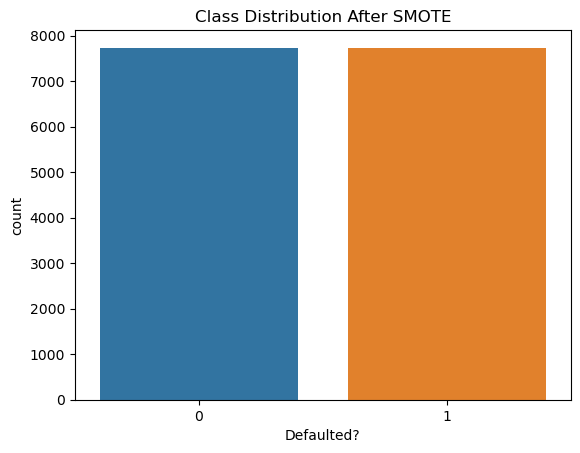

In [24]:
# countplot for checking the values after applying SMOTE:
sns.countplot(x=y_train_sm)
plt.title("Class Distribution After SMOTE")
plt.show()

In [26]:
# Scaling the data:
Sc = StandardScaler()
X_scaled_train = Sc.fit_transform(X_train_sm)
X_scaled_test = Sc.fit_transform(X_test)

In [28]:
svm = SVC(kernel='rbf',probability=True,random_state=42)
svm.fit(X_scaled_train,y_train_sm)

SVC(probability=True, random_state=42)

In [34]:
y_pred = svm.predict(X_scaled_test)
y_proba = svm.predict_proba(X_scaled_test)[:,1]
print(y_pred)
print(y_proba)

[1 1 0 ... 1 1 0]
[8.58053575e-01 8.91566204e-01 4.51155592e-01 ... 8.65713305e-01
 8.05711674e-01 4.13338599e-05]


In [35]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.69      1933
           1       0.07      1.00      0.13        67

    accuracy                           0.55      2000
   macro avg       0.53      0.76      0.41      2000
weighted avg       0.97      0.55      0.67      2000



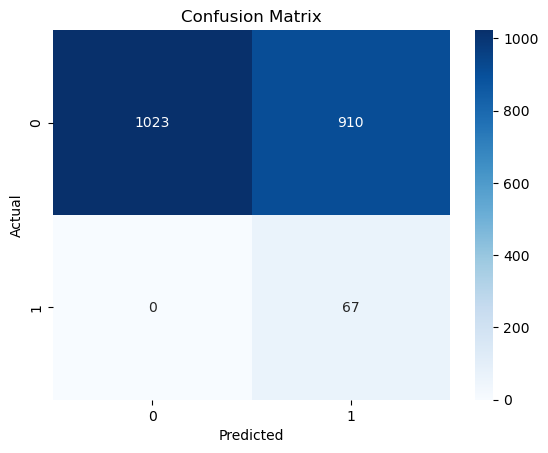

In [38]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [39]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1023,  910],
       [   0,   67]], dtype=int64)

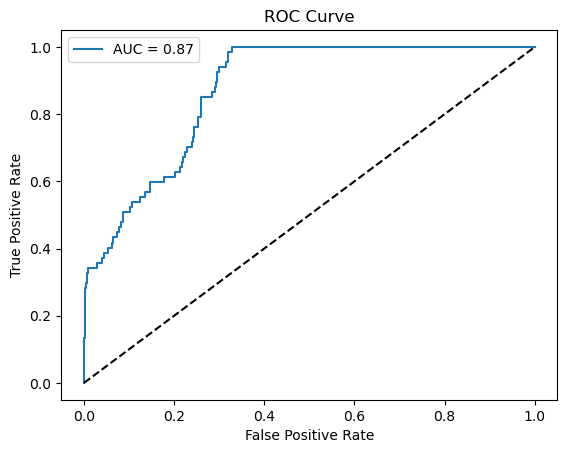

In [42]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()